## **Data Science and Machine Learning**

---


#### **CHAPTER 1: IMPORTING, SUMMARIZING, AND VISUALIZING DATA**
This chapter describes where to find useful data sets, how to load them into Python,
and how to (re)structure the data. We also discuss various ways in which the data can
be summarized via tables and figures. Which type of plots and numerical summaries
are appropriate depends on the type of the variable(s) in play.

**1.1 Introduction**

Data can be seen as the result of a random experiment, where the outcome is unpredictable but still analyzable. Typically, data is organized in tables with variables (features) as columns and individual items as rows. Three main types of columns exist: an identifier or index column, design-related features (deterministic), and observed measurements (variable).

Various data sets are available online, including at the UCI Machine Learning Repository. Data sets are often stored in CSV format, which is easily readable in Python using the pandas package.

In [ ]:
import pandas as pd

abalone = pd.read_csv('abalone.data',header = None)

It is important to add *header = None*, as this lets Python know that the first line of the
CSV does not contain the names of the features, as it assumes so by default. The data set
was originally used to predict the age of abalone from physical measurements, such as
shell weight and diameter.


Another useful repository of over 1000 data sets from various packages in the R programming language, collected by Vincent Arel-Bundock, can be found at:
https://vincentarelbundock.github.io/Rdatasets/datasets.html

In [ ]:
urlprefix = 'https://vincentarelbundock.github.io/Rdatasets/csv/'
dataname = 'datasets/iris.csv'
iris = pd. read_csv ( urlprefix + dataname )

The **iris** data set contains four physical measurements (sepal/petal length/width) on
50 specimens (each) of 3 species of iris: setosa, versicolor, and virginica. Note that in this
case the headers are included. The output of **read_csv** is a DataFrame object, which is **pandas**’s implementation of a spreadsheet. The DataFrame method
head gives the first few rows of the DataFrame, including the feature names. The number
of rows can be passed as an argument and is 5 by default.

The names of the features can be obtained via the *columns* attribute of the *DataFrame*
object, as in iris.columns. Note that the first column is a duplicate index column, whose
name (assigned by **pandas**) is 'Index Column'. We can drop this column and reassign the
iris object as follows.

In [ ]:
iris = iris.reset_index(drop=True)
iris = iris.set_index('rownames')


The data for each feature (corresponding to its specific name) can be accessed by using
Python’s *slicing* notation [  ]. For example, the object `iris[’Sepal.Length’]` contains
the 150 sepal lengths.


The first three rows of the **abalone** data set from the UCI repository can be found as
follows:

In [ ]:
abalone.head (3)

Here, the missing headers have been assigned according to the order of the natural
numbers. The names should correspond to Sex, Length, Diameter, Height, Whole weight,
Shucked weight, Viscera weight, Shell weight, and Rings, as described in the file with the
name abalone.names on the UCI website. We can manually add the names of the features
to the DataFrame by reassigning the columns attribute.

In [ ]:
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height',
'Whole weight','Shucked weight', 'Viscera weight', 'Shell weight',
'Rings']

**1.2 Structuring Features According to Type**

We can generally classify features as either quantitative or qualitative. *Quantitative* features possess “numerical quantity”, such as height, age, number of births, etc., and can either be
*continuous or discrete*. Continuous quantitative features take values in a continuous range
of possible values, such as height, voltage, or crop yield; such features capture the idea
that measurements can always be made more precisely. Discrete quantitative features have
a countable number of possibilities, such as a count.


In contrast, *qualitative* features do not have a numerical meaning, but their possible values can be divided into a fixed number of categories, such as {M,F} for gender or {blue,
black, brown, green} for eye color. For this reason such features are also called *categorical*.
A simple rule of thumb is: if it does not make sense to average the data, it is categorical.
For example, it does not make sense to average eye colors. Of course it is still possible to
represent categorical data with numbers, such as 1 = blue, 2 = black, 3 = brown, but such
numbers carry no quantitative meaning. Categorical features are often called *factors*.

When manipulating, summarizing, and displaying data, it is important to correctly specify the type of the variables (features). We illustrate this using the `nutrition_elderly`
data set from [73], which contains the results of a study involving nutritional measurements of thirteen features (columns) for 226 elderly individuals (rows). The data set can be
obtained from:
http://www.biostatisticien.eu/springeR/nutrition_elderly.xls

In [ ]:
xls = 'http://www.biostatisticien.eu/springeR/nutrition_elderly.xls'
nutri = pd.read_excel (xls)

This creates a DataFrame object nutri. The first three rows are as follows


In [ ]:
pd.set_option ('display.max_columns', 8) # to fit display
nutri.head (3)

,gender,situation,tea,coffee,...,raw_fruit,cooked_fruit_veg,chocol,fat
0,2,1,0,0,...,1,4,5,6
1,2,1,1,1,...,5,5,1,4
2,2,1,0,4,...,5,2,5,4


You can check the type (or structure) of the variables via the info method of nutri.

In [ ]:
nutri.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            226 non-null    int64
 1   situation         226 non-null    int64
 2   tea               226 non-null    int64
 3   coffee            226 non-null    int64
 4   height            226 non-null    int64
 5   weight            226 non-null    int64
 6   age               226 non-null    int64
 7   meat              226 non-null    int64
 8   fish              226 non-null    int64
 9   raw_fruit         226 non-null    int64
 10  cooked_fruit_veg  226 non-null    int64
 11  chocol            226 non-null    int64
 12  fat               226 non-null    int64
dtypes: int64(13)
memory usage: 23.1 KB


All 13 features in **nutri** are (at the moment) interpreted by Python as *quantitative*
variables, indeed as integers, simply because they have been entered as whole numbers.

We can modify the Python value and type for each categorical feature, using the
**replace** and **astype** methods. For categorical features, such as gender, we can replace
the value 1 with `'Male'` and 2 with `'Female'`, and change the type to `'category'` as
follows.

In [ ]:
DICT = {1:'Male', 2:'Female'} # dictionary specifies replacement
nutri['gender'] = nutri['gender']. replace(DICT).astype('category')

The structure of the other categorical-type features can be changed in a similar way.
Continuous features such as **height** should have type float.

In [ ]:
nutri['height'] = nutri['height']. astype(float)

We can repeat this for the other variables and save this modified data
frame as a CSV file, by using the **pandas** method` to_csv`.

In [ ]:
nutri.to_csv('nutri.csv',index=False)

**1.3 Summary Tables**

It is often useful to summarize a large spreadsheet of data in a more condensed form. A
table of counts or a table of frequencies makes it easier to gain insight into the underlying
distribution of a variable, especially if the data are qualitative. Such tables can be obtained
with the methods **describe** and **value_counts**.


As a first example, we load the **nutri** DataFrame, which we restructured and saved as `'nutri.csv'`, and then construct a summary for the feature
(column) `'fat'`.

In [ ]:
nutri = pd.read_csv('nutri.csv')
nutri['fat']. describe ()

,fat
count,226.000000
mean,3.814159
std,1.473009
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,8.000000


We see that there are 8 different types of fat used and that sunflower has the highest
count, with 68 out of 226 individuals using this type of cooking fat. The method
**value_counts** gives the counts for the different fat types.

In [ ]:
nutri['fat']. value_counts ()

,count
fat,
4,68
3,48
5,40
2,27
6,23
1,15
8,4
7,1


It is also possible to use **crosstab** to *cross tabulate* between two or more variables,
giving a *contingency table*.

In [ ]:
pd.crosstab (nutri.gender , nutri. situation )

situation,1,2,3
gender,,,
Female,78,56,7
Male,20,63,2


We see, for example, that the proportion of single men is substantially smaller than the
proportion of single women in the data set of elderly people. To add row and column totals
to a table, use `margins=True`.

In [ ]:
pd.crosstab (nutri.gender , nutri.situation , margins=True)

situation,1,2,3,All
gender,,,,
Female,78,56,7,141
Male,20,63,2,85
All,98,119,9,226


**1.4 Summary Statistics**

In the following, ${x} = \begin{bmatrix} x_1, \dots, x_n \end{bmatrix}^\top$ is a column vector of n numbers. For our nutri data, the ${x}$ could, for example, correspond to the heights of the *n* = 226 individuals.

The sample mean of ${x}$, denoted by $\bar{x}$, is simply the average of the data values: $$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$$



Using the **mean** method in Python for the **nutri** data, we have, for instance:

In [ ]:
nutri['height']. mean ()

163.96017699115043

The *p-sample quantile* (0 < *p* < 1) of ${x}$ is a value ${x}$ such that at least a fraction p of the data is less than or equal to ${x}$ and at least a fraction 1 − *p* of the data is greater than or equal
to ${x}$. The *sample median* is the sample 0.5-quantile. The *p-sample quantile* is also called the 100 × *p percentile*. The 25, 50, and 75 sample percentiles are called the first, second,
and third *quartiles* of the data. For the **nutri** data they are obtained as follows.

In [ ]:
nutri['height']. quantile (q=[0.25 ,0.5 ,0.75])

,height
0.25,157.0
0.50,163.0
0.75,170.0


The sample mean and median give information about the *location* of the data, while the
distance between sample quantiles (say the 0.1 and 0.9 quantiles) gives some indication of
the *dispersion* (spread) of the data. Other measures for dispersion are the *sample range*,
${max}_i x_i - {min}_i x_i$
, *the sample variance* $$s^2 = \frac{1}{n-1} \sum_{i=1}^{n} \left( x_i - \bar{x} \right)^2$$
and the sample standard deviation $s = \sqrt{s^2}$
. For the nutri data, the range (in cm) is:

In [ ]:
nutri['height'].max() - nutri['height'].min()

48.0

The variance (in cm²) is:

In [ ]:
round(nutri['height']. var (), 2) # round to two decimal places

81.06

And the standard deviation can be found via:

In [ ]:
round(nutri['height']. std (), 2)

9.0

We already encountered the **describe** method in the previous section for summarizing
qualitative features, via the most frequent count and the number of unique elements. When
applied to a *quantitative* feature, it returns instead the minimum, maximum, mean, and the
three quartiles. For example, the `'height'` feature in the **nutri** data has the following
summary statistics.


In [ ]:
nutri['height']. describe ()

,height
count,226.000000
mean,163.960177
std,9.003368
min,140.000000
25%,157.000000
50%,163.000000
75%,170.000000
max,188.000000


**1.5 Visualizing Data**

In this section we describe various methods for visualizing data. The main point we would
like to make is that the way in which variables are visualized should always be adapted to
the variable types; for example, qualitative data should be plotted differently from quantitative data

For the rest of this section, it is assumed that **matplotlib.pyplot, pandas**, and
**numpy**, have been imported in the Python code as follows.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

***1.5.1 Plotting Qualitative Variables***

Suppose we wish to display graphically how many elderly people are living by themselves,
as a couple, with family, or other. Recall that the data are given in the situation column
of our **nutri** data. Assuming that we already *restructured the data*, as in Section 1.2, we can make a *barplot* of the number of people in each category via the plt.bar function of the standard matplotlib plotting library. The inputs are the x-axis positions, heights, and
widths of each bar respectively.


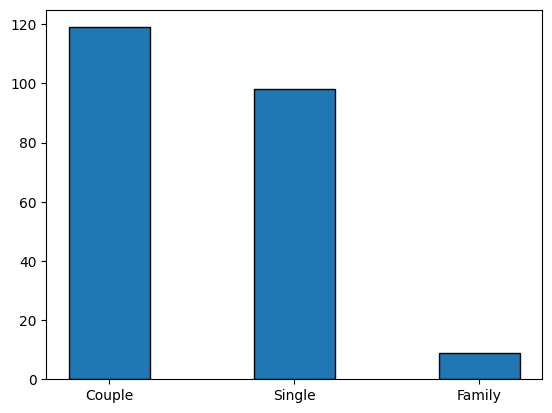

In [ ]:
width = 0.35 # the width of the bars
x = [0, 0.8, 1.6] # the bar positions on x-axis
situation_counts =nutri['situation']. value_counts ()
plt.bar(x, situation_counts , width , edgecolor = 'black')
plt.xticks(x, ['Couple', 'Single', 'Family'])
plt.show ()

***1.5.2 Plotting Quantitative Variables***

We now present a few useful methods for visualizing quantitative data, again using the
**nutri** data set. We will first focus on continuous features (e.g., `'age'`) and then add some
specific graphs related to discrete features (e.g., `'tea'`). The aim is to describe the variability present in a single feature. This typically involves a central tendency, where observations tend to gather around, with fewer observations further away. The main aspects of the
distribution are the *location* (or center) of the variability, the *spread* of the variability (how
far the values extend from the center), and the *shape* of the variability; e.g., whether or not
values are spread symmetrically on either side of the center.

*1.5.2.1 Boxplot*

A *boxplot* can be viewed as a graphical representation of the five-number summary of
boxplot
the data consisting of the minimum, maximum, and the first, second, and third quartiles.

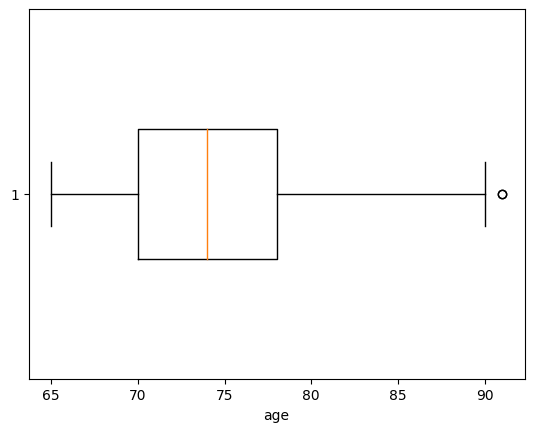

In [ ]:
plt.boxplot(nutri['age'],widths=width ,vert=False)
plt.xlabel('age')
plt.show ()

The widths parameter determines the width of the boxplot, which is by default plotted
vertically. Setting `vert=False` plots the boxplot horizontally.

The box is drawn from the first quartile ($Q_1$) to the third quartile ($Q_3$). The vertical line
inside the box signifies the location of the median. So-called “whiskers” extend to either
side of the box. The size of the box is called the $\text{Interquartile Range: } IQR = Q_3 - Q_1$. The
left whisker extends to the largest of (a) the minimum of the data and (b) $Q_1 - 1.5 \times IQR$.
Similarly, the right whisker extends to the smallest of (a) the maximum of the data and
(b) $Q_3 + 1.5 \times IQR$. Any data point outside the whiskers is indicated by a small hollow dot,
indicating a suspicious or deviant point (outlier). Note that a boxplot may also be used for
discrete quantitative features.

*1.5.2.2 Histogram*

A *histogram* is a common graphical representation of the distribution of a quantitative
feature. We start by breaking the range of the values into a number of *bins* or *classes*.
We tally the counts of the values falling in each bin and then make the plot by drawing
rectangles whose bases are the bin intervals and whose heights are the counts. In Python
we can use the function **plt.hist**.

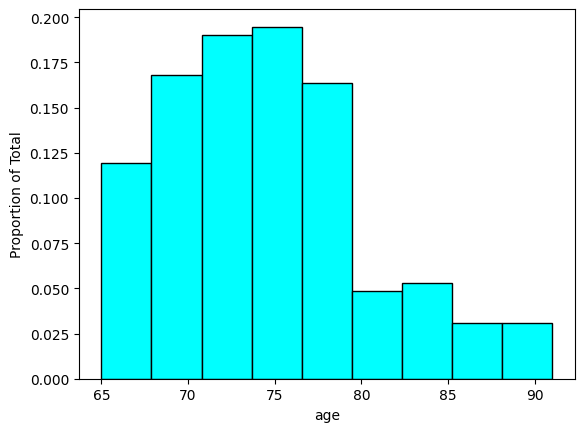

In [ ]:
weights = np.ones_like (nutri.age)/nutri.age.count ()
plt.hist(nutri.age ,bins =9, weights=weights , facecolor ='cyan',
edgecolor ='black', linewidth =1)
plt.xlabel('age')
plt.ylabel('Proportion of Total')
plt.show ()

Here 9 bins were used. Rather than using raw counts (the default), the vertical axis
here gives the percentage in each class, defined by $\frac{\text{count}}{\text{total}}$. This is achieved by choosing the
“weights” parameter to be equal to the vector with entries 1/266, with length 226. Various
plotting parameters have also been changed.

Histograms can also be used for discrete features, although it may be necessary to
explicitly specify the bins and placement of the ticks on the axes.

*1.5.2.3 Empirical Cumulative Distribution Function*

The *empirical cumulative distribution function*, denoted by $F_n$, is a step function which jumps an amount $k/n$ at observation values, where $k$ is the number of tied observations at that value. For observations $x_1, \ldots, x_n$, $F_n(x)$ is the fraction of observations less than or equal to $x$, i.e.,

$$
F_n(x) = \frac{\text{number of } x_i \leq x}{n} = \frac{1}{n} \sum_{i=1}^{n} \mathbf{1} \{x_i \leq x\},
$$

where $\mathbf{1}$ denotes the indicator function; that is, $\mathbf{1} \{x_i \leq x\}$ is equal to 1 when $x_i \leq x$ and 0 otherwise. To produce a plot of the empirical cumulative distribution function we can use the **plt.step** function.

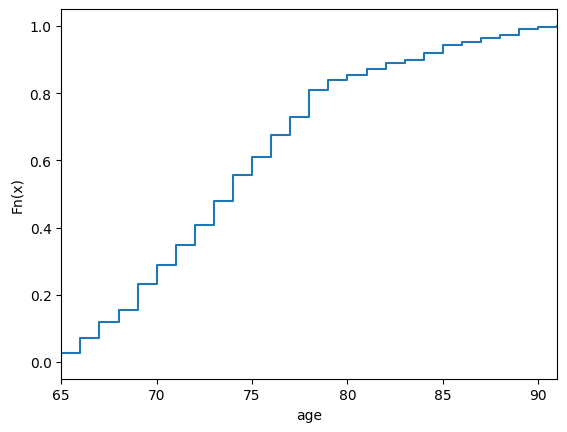

In [ ]:
x = np.sort(nutri.age)
y = np.linspace (0,1,len(nutri.age))
plt.xlabel('age')
plt.ylabel('Fn(x)')
plt.step(x,y)
plt.xlim(x.min(),x.max())
plt.show ()

***1.5.3 Data Visualization in a Bivariate Setting***

In this section, we present a few useful visual aids to explore relationships between two
features. The graphical representation will depend on the type of the two features.

*1.5.3.1 Two-way Plots for Two Categorical Variables*

Comparing barplots for two categorical variables involves introducing subplots to the figure.

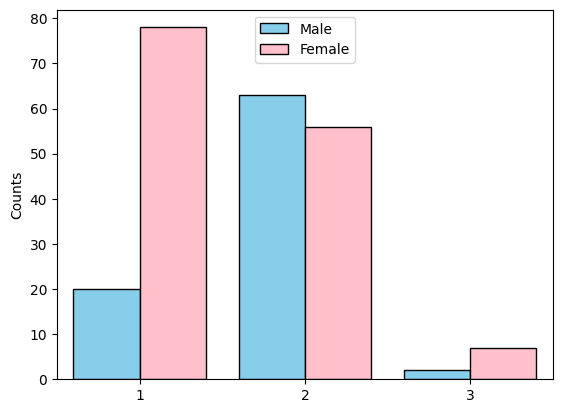

In [ ]:
import seaborn as sns
sns. countplot (x='situation', hue = 'gender', data=nutri ,
hue_order = ['Male', 'Female'], palette = ['SkyBlue','Pink'],
saturation = 1, edgecolor ='black')
plt.legend(loc='upper center')
plt.xlabel('')
plt.ylabel('Counts')
plt.show ()

The figure was made using the **seaborn** package, which was specifically designed to
simplify statistical visualization tasks.


*1.5.3.2 Plots for Two Quantitative Variables*

We can visualize patterns between two quantitative features using a *scatterplot*. This can be
done with **plt.scatter**. The following code produces a scatterplot of `'weight'` against
`'height'` for the **nutri** data.

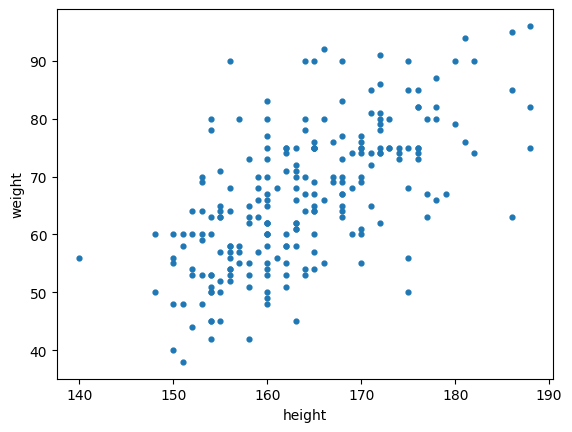

In [ ]:
plt.scatter(nutri.height , nutri.weight , s=12, marker='o')
plt.xlabel('height')
plt.ylabel('weight')
plt.show ()

The next Python code illustrates that it is possible to produce highly sophisticated scater plots. The figure shows the birth weights (mass) of babies whose
mothers smoked (blue triangles) or not (red circles). In addition, straight lines were fitted to
the two groups, suggesting that birth weight decreases with age when the mother smokes,
but increases when the mother does not smoke! The question is whether these trends are
statistically significant or due to chance. We will revisit this data set later on in the book.

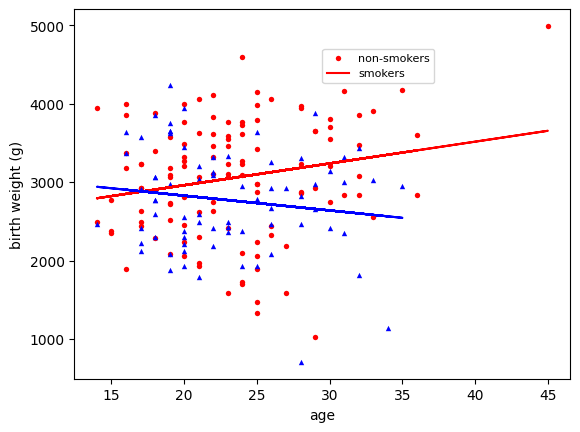

In [ ]:
urlprefix = 'https://vincentarelbundock.github.io/Rdatasets/csv/'
dataname = 'MASS/birthwt.csv'
bwt = pd.read_csv( urlprefix + dataname)
bwt = bwt.reset_index(drop=True)
bwt = bwt.set_index('rownames')
styles = {0: ['o','red'], 1: ['^','blue']}
for k in styles:
  grp = bwt[bwt.smoke ==k]
  m,b = np.polyfit(grp.age , grp.bwt , 1) # fit a straight line
  plt.scatter(grp.age , grp.bwt , c=styles[k][1] , s=15, linewidth =0,
              marker = styles[k][0])
  plt.plot(grp.age , m*grp.age + b, '-', color=styles[k][1])

plt.xlabel('age')
plt.ylabel('birth weight (g)')
plt.legend (['non-smokers','smokers'],prop ={'size':8},
loc =(0.5 ,0.8))
plt.show ()

*1.5.3.3 Plots for One Qualitative and One Quantitative Variable*

In this setting, it is interesting to draw boxplots of the quantitative feature for each level
of the categorical feature.

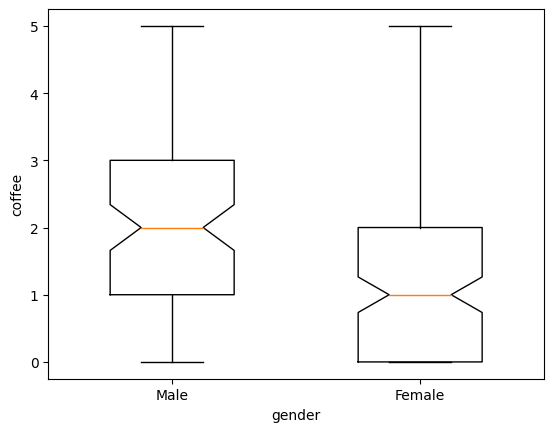

In [ ]:
males = nutri[nutri.gender == 'Male']
females = nutri[nutri.gender == 'Female']
plt.boxplot ([ males.coffee ,females.coffee],notch=True ,widths
=(0.5 ,0.5))
plt.xlabel('gender')
plt.ylabel('coffee')
plt.xticks ([1 ,2] ,['Male','Female'])
plt.show ()